In [1]:
import pandas as pd
import numpy as np
import datetime as dt
car = pd.read_csv('car_price_prediction.csv')
car = car.drop_duplicates()
car.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [2]:
#levy to numeric
car['Levy'] = pd.to_numeric(car['Levy'], errors='coerce')
#turbo
car['Engine volume'] = pd.to_numeric(car['Engine volume'].str.replace(' Turbo', '', regex=False), errors='coerce')
#remove km of mileage
car['Mileage'] = pd.to_numeric(car['Mileage'].str.replace(' km', '', regex=False), errors='coerce')


#production year as Age
dtime = dt.datetime.now()
car['Age']=dtime.year - car['Prod. year']

#Dropping unnecessary columns
car = car.drop(['ID', 'Doors' ,'Prod. year'], axis=1)

#  'Manufacturer' column grouping levels having a proportion less than .05 to other
level_counts = car['Manufacturer'].value_counts(normalize=True)
levels_to_group = level_counts[level_counts < .05].index
car['Manufacturer'] = car['Manufacturer'].replace(levels_to_group, 'Other')
car['Manufacturer'] = car['Manufacturer'].astype('category')

#  'Model' column grouping levels having a proportion less than .025 to other
model_counts = car['Model'].value_counts(normalize=True)
models_to_group = model_counts[model_counts < 0.025].index
car['Model'] = car['Model'].replace(models_to_group, 'Other')
car['Model'] = car['Model'].astype('category')

# 'Color' column grouping levels having a proportion less than .01 to other
color_counts = car['Color'].value_counts(normalize=True)
colors_to_group = color_counts[color_counts < .01].index
car['Color'] = car['Color'].replace(colors_to_group, 'Other')
car['Color'] = car['Color'].astype('category')

# Print unique levels in the 'Manufacturer' column after grouping
unique_manufacturer = car['Manufacturer'].unique()
print("Unique levels in the 'Manufacturer' column after grouping:")
print(unique_manufacturer)

# Print unique levels in the 'Model' column after grouping
unique_model = car['Model'].unique()
print("Unique levels in the 'Model' column after grouping:")
print(unique_model)

# Print unique levels in the 'Color' column after grouping
unique_colors = car['Color'].unique()
print("Unique levels in the 'Color' column after grouping:")
print(unique_colors)


Unique levels in the 'Manufacturer' column after grouping:
['Other', 'CHEVROLET', 'HONDA', 'FORD', 'HYUNDAI', 'TOYOTA', 'MERCEDES-BENZ', 'BMW']
Categories (8, object): ['BMW', 'CHEVROLET', 'FORD', 'HONDA', 'HYUNDAI', 'MERCEDES-BENZ',
                         'Other', 'TOYOTA']
Unique levels in the 'Model' column after grouping:
['Other', 'Santa FE', 'Prius', 'Sonata', 'Camry', 'E 350', 'Elantra']
Categories (7, object): ['Camry', 'E 350', 'Elantra', 'Other', 'Prius', 'Santa FE', 'Sonata']
Unique levels in the 'Color' column after grouping:
['Silver', 'Black', 'White', 'Grey', 'Blue', 'Green', 'Red', 'Other', 'Orange']
Categories (9, object): ['Black', 'Blue', 'Green', 'Grey', ..., 'Other', 'Red', 'Silver', 'White']


In [3]:
car.head()

,Price,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Age
0,13328,1399.0,Other,Other,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,Left wheel,Silver,12,14
1,16621,1018.0,CHEVROLET,Other,Jeep,No,Petrol,3.0,192000,6.0,Tiptronic,4x4,Left wheel,Black,8,13
2,8467,NaN,HONDA,Other,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,Right-hand drive,Black,2,18
3,3607,862.0,FORD,Other,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,Left wheel,White,0,13
4,11726,446.0,HONDA,Other,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,Left wheel,Silver,4,10


In [4]:
from sklearn.model_selection import train_test_split

y = np.log(car['Price'])

# Split the dataset into features (X) and the logarithm of the target variable (y)
X = car.drop('Price', axis=1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#Median imputation on levy
X_train['Levy'] = X_train['Levy'].fillna( X_train['Levy'].median())
X_test['Levy'] = X_test['Levy'].fillna( X_test['Levy'].median())



In [5]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np


In [6]:
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = ["Manufacturer", "Fuel type", "Color", "Model", "Category",
                        "Leather interior", "Gear box type", "Drive wheels", "Wheel"]

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with most frequent
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical columns
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)



In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Define the multiple regression model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())  # You can replace LinearRegression with any other regression model
])

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate Mean Squared Error for training and testing sets
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f'Train root Mean Squared Error: {train_rmse:.6f}')
print(f'Test root Mean Squared Error: {test_rmse:.6f}')


# R-squared value on the testing set
test_r2 = r2_score(y_test, y_test_pred)

print(f'Test R-squared: {test_r2:.6f}')

Train root Mean Squared Error: 1.392129
Test root Mean Squared Error: 1.428678
Test R-squared: 0.206801


In [8]:
import numpy as np
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline

# Define a broader range of alpha values for Ridge
alphas_ridge = np.arange(19, 22, 0.005)

# Define the Ridge regression model with cross-validation for alpha selection
ridge_model = RidgeCV(alphas=alphas_ridge, store_cv_values=True)

# Define the pipeline including Ridge regression
ridge_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', ridge_model)
])

# Fit the model on the training data
ridge_pipeline.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_train_pred_ridge = ridge_pipeline.predict(X_train)
y_test_pred_ridge = ridge_pipeline.predict(X_test)

# Calculate Mean Squared Error for training and testing sets
train_rmse_ridge = np.sqrt(mean_squared_error(y_train, y_train_pred_ridge))
test_rmse_ridge = np.sqrt(mean_squared_error(y_test, y_test_pred_ridge))

# Get the best alpha value
best_alpha_ridge = ridge_model.alpha_

# Calculate R-squared value for testing set
test_r2_ridge = r2_score(y_test, y_test_pred_ridge)

print(f'Best Alpha for Ridge: {best_alpha_ridge:.4f}')
print(f'Train root Mean Squared Error (Ridge): {train_rmse_ridge:.6f}')
print(f'Test root Mean Squared Error (Ridge): {test_rmse_ridge:.6f}')
print(f'Test R-squared (Ridge): {test_r2_ridge:.6f}')


Best Alpha for Ridge: 20.7800
Train root Mean Squared Error (Ridge): 1.392254
Test root Mean Squared Error (Ridge): 1.428596
Test R-squared (Ridge): 0.206892


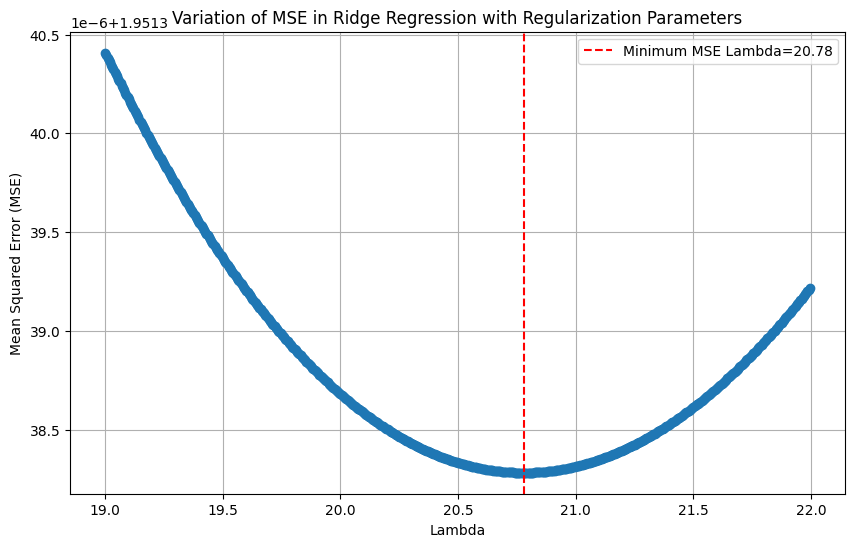

In [9]:
import matplotlib.pyplot as plt

# Hardcoded lambda value
min_lambda = 20.78

# Extract cross-validation MSE values for each alpha
cv_mse_values = ridge_model.cv_values_

# Compute mean MSE values across cross-validation folds
mean_cv_mse_values = np.mean(cv_mse_values, axis=0)

# Plot the variation of MSE values with different alphas
plt.figure(figsize=(10, 6))
plt.plot(alphas_ridge, mean_cv_mse_values, marker='o', linestyle='-')
plt.axvline(x=min_lambda, color='r', linestyle='--', label=f'Minimum MSE Lambda={min_lambda}')
plt.xlabel('Lambda')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Variation of MSE in Ridge Regression with Regularization Parameters')
plt.grid(True)
plt.legend()
plt.show()


In [10]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline

# Define a broader range of alpha values for Lasso
alphas_lasso = np.arange(0.0001, 0.001, 0.0001)

# Define the Lasso regression model with cross-validation for alpha selection
lasso_model = LassoCV(alphas=alphas_lasso, cv=5)

# Define the pipeline including Lasso regression
lasso_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', lasso_model)
])

# Fit the model on the training data
lasso_pipeline.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_train_pred_lasso = lasso_pipeline.predict(X_train)
y_test_pred_lasso = lasso_pipeline.predict(X_test)

# Calculate Mean Squared Error for training and testing sets
train_rmse_lasso = np.sqrt(mean_squared_error(y_train, y_train_pred_lasso))
test_rmse_lasso = np.sqrt(mean_squared_error(y_test, y_test_pred_lasso))

# Get the best alpha value for Lasso
best_alpha_lasso = lasso_model.alpha_

# Calculate R-squared value for testing set
test_r2_lasso = r2_score(y_test, y_test_pred_lasso)

print(f'Best Alpha for Lasso: {best_alpha_lasso:.4f}')
print(f'Train root Mean Squared Error (Lasso): {train_rmse_lasso:.6f}')
print(f'Test root Mean Squared Error (Lasso): {test_rmse_lasso:.6f}')
print(f'Test R-squared (Lasso): {test_r2_lasso:.6f}')


Best Alpha for Lasso: 0.0007
Train root Mean Squared Error (Lasso): 1.392423
Test root Mean Squared Error (Lasso): 1.428340
Test R-squared (Lasso): 0.207176


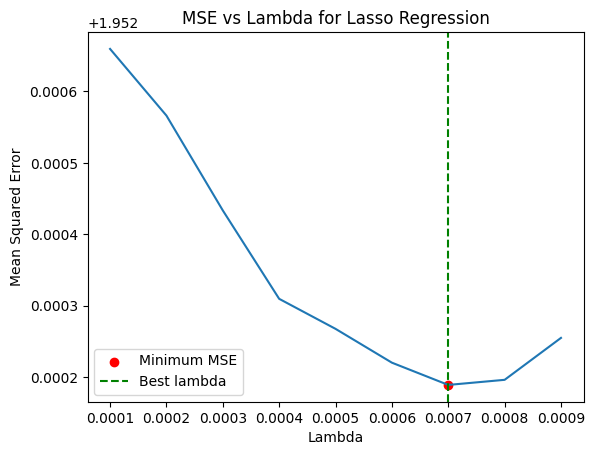

In [11]:
# Define the Lasso regression model with cross-validation for alpha selection
lasso_model = LassoCV(alphas=alphas_lasso, cv=5)

lasso_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', lasso_model)
])

# Fit the model on the training data
lasso_pipeline.fit(X_train, y_train)


# Get the MSE values for each alpha value
mse_values = lasso_model.mse_path_

# Get the lambda values for each alpha value
lambda_values = lasso_model.alphas_

# Calculate the mean MSE across the cross-validation folds
mean_mse_values = np.mean(mse_values, axis=1)

# Plot the MSE vs lambda graph
plt.plot(lambda_values, mean_mse_values)
plt.xlabel('Lambda')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs Lambda for Lasso Regression')


best_alpha_lasso = lasso_model.alpha_
min_mse_index = np.argmin(mean_mse_values)
plt.scatter(lambda_values[min_mse_index], mean_mse_values[min_mse_index], color='red', label='Minimum MSE')
plt.axvline(x=best_alpha_lasso, color='green', linestyle='--', label='Best lambda')
plt.legend()
plt.show()

In [12]:
import matplotlib.pyplot as plt

# Fit the model on the training data
lasso_pipeline.fit(X_train, y_train)

# Access the coefficients of the Lasso model
lasso_coefs = lasso_model.coef_

# Get the feature names after preprocessing
numeric_feature_names = preprocessor.named_transformers_['num'].get_feature_names_out()
categorical_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out()
feature_names = np.concatenate([numeric_feature_names, categorical_feature_names])

# Create a dictionary to store the feature names and their corresponding coefficients
feature_coefficients = dict(zip(feature_names, lasso_coefs))

# Get the names of the features set to zero
zero_coefficients = [feature for feature, coef in feature_coefficients.items() if coef == 0]

print("Features set to zero by Lasso regularization:")
for feature in zero_coefficients:
    print(feature)



Features set to zero by Lasso regularization:
Cylinders
Manufacturer_CHEVROLET
Manufacturer_MERCEDES-BENZ
Fuel type_CNG
Fuel type_Hydrogen
Color_Blue
Color_Orange
Model_Elantra
Category_Cabriolet
Category_Limousine
Category_Minivan
Category_Pickup
Drive wheels_Front
Wheel_Right-hand drive


In [13]:
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline

# Define a broader range of alpha values for Elastic Net
alphas_elastic_net = np.arange(0.001, 0.01, 0.01)

# Define the Elastic Net regression model with cross-validation for alpha and l1_ratio selection
elastic_net_model = ElasticNetCV(alphas=alphas_elastic_net, l1_ratio=np.arange(0.001, 0.01, 0.01)
, cv=5)

# Define the pipeline including Elastic Net regression
elastic_net_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', elastic_net_model)
])

# Fit the model on the training data
elastic_net_pipeline.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_train_pred_elastic_net = elastic_net_pipeline.predict(X_train)
y_test_pred_elastic_net = elastic_net_pipeline.predict(X_test)

# Calculate Mean Squared Error for training and testing sets
train_rmse_elastic_net = np.sqrt(mean_squared_error(y_train, y_train_pred_elastic_net))
test_rmse_elastic_net = np.sqrt(mean_squared_error(y_test, y_test_pred_elastic_net))

# Get the best alpha value and l1_ratio for Elastic Net
best_alpha_elastic_net = elastic_net_model.alpha_
best_l1_ratio_elastic_net = elastic_net_model.l1_ratio_

# Calculate R-squared value for testing set
test_r2_elastic_net = r2_score(y_test, y_test_pred_elastic_net)

print(f'Best Alpha for Elastic Net: {best_alpha_elastic_net:.4f}')
print(f'Best L1 Ratio for Elastic Net: {best_l1_ratio_elastic_net:.4f}')
print(f'Train root Mean Squared Error (Elastic Net): {train_rmse_elastic_net:.6f}')
print(f'Test root Mean Squared Error (Elastic Net): {test_rmse_elastic_net:.6f}')
print(f'Test R-squared (Elastic Net): {test_r2_elastic_net:.6f}')


Best Alpha for Elastic Net: 0.0010
Best L1 Ratio for Elastic Net: 0.0010
Train root Mean Squared Error (Elastic Net): 1.392207
Test root Mean Squared Error (Elastic Net): 1.428610
Test R-squared (Elastic Net): 0.206876


In [14]:
# Get the coefficients of the Elastic Net model
elastic_net_coefs = elastic_net_model.coef_

# Get the feature names after preprocessing
numeric_feature_names = preprocessor.named_transformers_['num'].get_feature_names_out()
categorical_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out()
feature_names = np.concatenate([numeric_feature_names, categorical_feature_names])

# Create a dictionary to store the feature names and their corresponding coefficients
feature_coefficients = dict(zip(feature_names, elastic_net_coefs))

# Get the names of the features set to zero
zero_coefficients = [feature for feature, coef in feature_coefficients.items() if coef == 0]

print("Features set to zero by Elastic Net regularization:")
for feature in zero_coefficients:
    print(feature)


Features set to zero by Elastic Net regularization:


In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline

# Define the Random Forest regression model
random_forest_model = RandomForestRegressor(n_estimators=150,max_depth=10, random_state=42)

# Define the pipeline including Random Forest regression
random_forest_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', random_forest_model)
])

# Fit the model on the training data
random_forest_pipeline.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_train_pred_rf = random_forest_pipeline.predict(X_train)
y_test_pred_rf = random_forest_pipeline.predict(X_test)

# Calculate Mean Squared Error for training and testing sets
train_rmse_rf = np.sqrt(mean_squared_error(y_train, y_train_pred_rf))
test_rmse_rf = np.sqrt(mean_squared_error(y_test, y_test_pred_rf))

# Calculate R-squared value for testing set
test_r2_rf = r2_score(y_test, y_test_pred_rf)

print(f'Train root Mean Squared Error (Random Forest): {train_rmse_rf:.6f}')
print(f'Test root Mean Squared Error (Random Forest): {test_rmse_rf:.6f}')
print(f'Test R-squared (Random Forest): {test_r2_rf:.6f}')


Train root Mean Squared Error (Random Forest): 0.934721
Test root Mean Squared Error (Random Forest): 1.112261
Test R-squared (Random Forest): 0.519242


In [16]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline

# Define the XGBoost regression model
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Define the pipeline including XGBoost regression
xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', xgb_model)
])

# Fit the model on the training data
xgb_pipeline.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_train_pred_xgb = xgb_pipeline.predict(X_train)
y_test_pred_xgb = xgb_pipeline.predict(X_test)

# Calculate Mean Squared Error for training and testing sets
train_rmse_xgb = np.sqrt(mean_squared_error(y_train, y_train_pred_xgb))
test_rmse_xgb = np.sqrt(mean_squared_error(y_test, y_test_pred_xgb))

# Calculate R-squared value for testing set
test_r2_xgb = r2_score(y_test, y_test_pred_xgb)

print(f'Train root Mean Squared Error (XGBoost): {train_rmse_xgb:.6f}')
print(f'Test root Mean Squared Error (XGBoost): {test_rmse_xgb:.6f}')
print(f'Test R-squared (XGBoost): {test_r2_xgb:.6f}')


Train root Mean Squared Error (XGBoost): 0.707298
Test root Mean Squared Error (XGBoost): 1.037399
Test R-squared (XGBoost): 0.581780


In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Get the names of the numeric features
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns

# Calculate VIF for each predictor variable
vif_data = X_train[numeric_features]
vif = pd.DataFrame()
vif["Feature"] = vif_data.columns
vif["VIF"] = [variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])]

print(vif)


         Feature        VIF
0           Levy   8.619290
1  Engine volume  23.353667
2        Mileage   1.006278
3      Cylinders  30.024272
4        Airbags   3.329086
5            Age   5.430781


Top 10 Important Predictors:
Airbags: 0.2282
Gear box type_Automatic: 0.1655
Age: 0.1395
Mileage: 0.1109
Levy: 0.0585
Engine volume: 0.0511
Fuel type_Hybrid: 0.0264
Category_Jeep: 0.0193
Leather interior_Yes: 0.0180
Manufacturer_HONDA: 0.0168


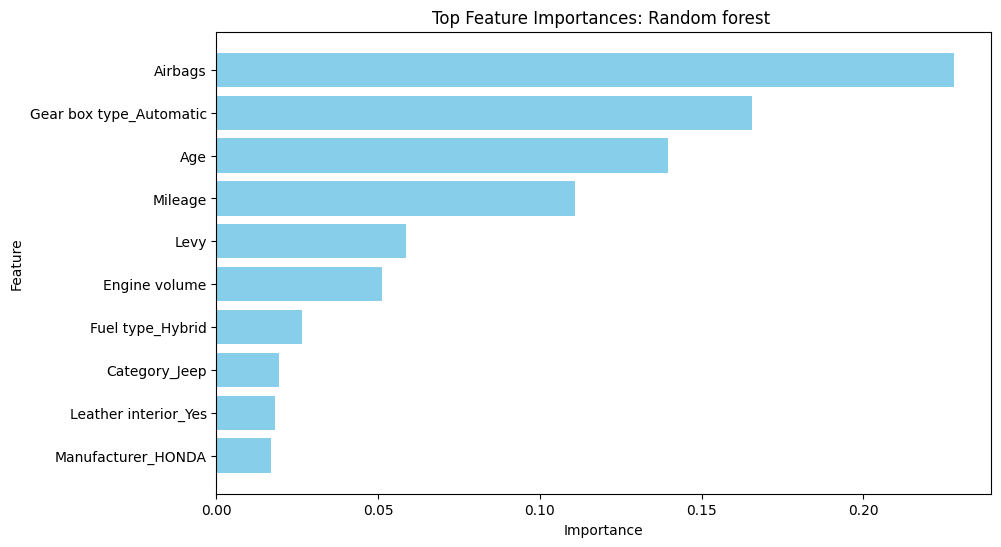

In [18]:
# Get feature importances
importances = random_forest_pipeline.named_steps['regressor'].feature_importances_

numeric_key = 'num'
categorical_key = 'cat'

# Get the names of the features after preprocessing
numeric_feature_names = preprocessor.named_transformers_[numeric_key].named_steps['scaler'].get_feature_names_out(input_features=numeric_features)
categorical_feature_names = preprocessor.named_transformers_[categorical_key].named_steps['onehot'].get_feature_names_out(input_features=categorical_features)
preprocessed_feature_names = np.concatenate([numeric_feature_names, categorical_feature_names])

# Map feature importances to their corresponding names
feature_importances_dict = dict(zip(preprocessed_feature_names, importances))

# Sort feature importances in descending order
sorted_feature_importances = sorted(feature_importances_dict.items(), key=lambda x: x[1], reverse=True)

# Print top N important predictors
N = 10  # Adjust as needed
print(f"Top {N} Important Predictors:")
for feature, importance in sorted_feature_importances[:N]:
    print(f"{feature}: {importance:.4f}")

# Get the names and importances of the top N important predictors
top_features = [feature for feature, _ in sorted_feature_importances[:N]]
top_importances = [importance for _, importance in sorted_feature_importances[:N]]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(top_features, top_importances, color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top Feature Importances: Random forest ')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()


Top 10 Important Predictors:
Gear box type_Automatic: 0.1353
Fuel type_Hybrid: 0.0641
Gear box type_Tiptronic: 0.0582
Airbags: 0.0560
Leather interior_No: 0.0421
Manufacturer_HONDA: 0.0376
Category_Jeep: 0.0319
Category_Microbus: 0.0300
Wheel_Left wheel: 0.0281
Age: 0.0266


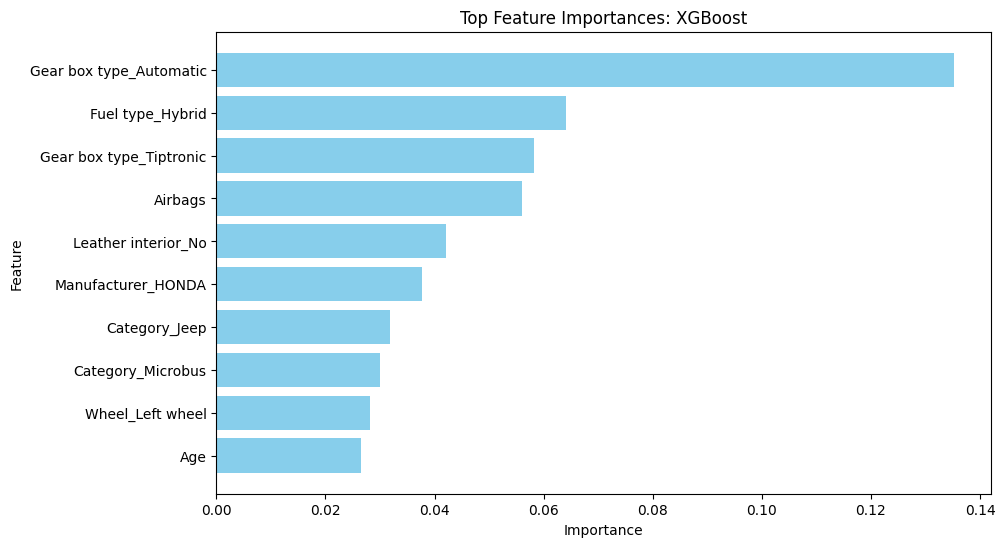

In [19]:
#Feature importance plot for xgboost
importances = xgb_pipeline.named_steps['regressor'].feature_importances_
numeric_key = 'num'
categorical_key = 'cat'

numeric_feature_names = preprocessor.named_transformers_[numeric_key].named_steps['scaler'].get_feature_names_out(input_features=numeric_features)
categorical_feature_names = preprocessor.named_transformers_[categorical_key].named_steps['onehot'].get_feature_names_out(input_features=categorical_features)
preprocessed_feature_names = np.concatenate([numeric_feature_names, categorical_feature_names])

feature_importances_dict = dict(zip(preprocessed_feature_names, importances))
sorted_feature_importances = sorted(feature_importances_dict.items(), key=lambda x: x[1], reverse=True)

N = 10
print(f"Top {N} Important Predictors:")
for feature, importance in sorted_feature_importances[:N]:
    print(f"{feature}: {importance:.4f}")

top_features = [feature for feature, _ in sorted_feature_importances[:N]]
top_importances = [importance for _, importance in sorted_feature_importances[:N]]

plt.figure(figsize=(10, 6))
plt.barh(top_features, top_importances, color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top Feature Importances: XGBoost')
plt.gca().invert_yaxis()
plt.show()


In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline

# Define the Random Forest regression model
random_forest_model = RandomForestRegressor(n_estimators=150,max_depth=10, random_state=42)

# Define the pipeline including Random Forest regression
random_forest_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', random_forest_model)
])

# Fit the model on the training data
random_forest_pipeline.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_train_pred_rf = random_forest_pipeline.predict(X_train)
y_test_pred_rf = random_forest_pipeline.predict(X_test)

# Calculate Mean Squared Error for training and testing sets
train_rmse_rf = np.sqrt(mean_squared_error(y_train, y_train_pred_rf))
test_rmse_rf = np.sqrt(mean_squared_error(y_test, y_test_pred_rf))

# Calculate R-squared value for testing set
test_r2_rf = r2_score(y_test, y_test_pred_rf)

print(f'Train root Mean Squared Error (Random Forest): {train_rmse_rf:.6f}')
print(f'Test root Mean Squared Error (Random Forest): {test_rmse_rf:.6f}')
print(f'Test R-squared (Random Forest): {test_r2_rf:.6f}')


Train root Mean Squared Error (Random Forest): 0.934721
Test root Mean Squared Error (Random Forest): 1.112261
Test R-squared (Random Forest): 0.519242
